In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# 3. Chargement des données King County

print("📂 Chargement des données King County...")
# Chargement du dataset King County
df = pd.read_csv('kc_house_data.csv')
df

📂 Chargement des données King County...


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
print("📊 Aperçu des données :")
print(f"Nombre d'observations : {df.shape[0]:,}")
print(f"Nombre de variables : {df.shape[1]}")
print("\n" + "="*60)

📊 Aperçu des données :
Nombre d'observations : 21,613
Nombre de variables : 21



In [5]:
# Affichage des premières lignes
print("🔍 Premières observations :")
display(df.head())

🔍 Premières observations :


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Informations sur les colonnes
print("\n📋 Structure des données :")
print("Colonnes disponibles :")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


📋 Structure des données :
Colonnes disponibles :
 1. id
 2. date
 3. price
 4. bedrooms
 5. bathrooms
 6. sqft_living
 7. sqft_lot
 8. floors
 9. waterfront
10. view
11. condition
12. grade
13. sqft_above
14. sqft_basement
15. yr_built
16. yr_renovated
17. zipcode
18. lat
19. long
20. sqft_living15
21. sqft_lot15


In [7]:
# Informations détaillées
print(f"\n📈 Informations détaillées :")
display(df.info())


📈 Informations détaillées :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 

None

In [8]:
# Vérification de la variable cible
print(f"\n🎯 Variable cible 'price' :")
print(f"  • Prix minimum : ${df['price'].min():,}")
print(f"  • Prix maximum : ${df['price'].max():,}")
print(f"  • Prix moyen : ${df['price'].mean():,.0f}")
print(f"  • Prix médian : ${df['price'].median():,.0f}")


🎯 Variable cible 'price' :
  • Prix minimum : $75,000.0
  • Prix maximum : $7,700,000.0
  • Prix moyen : $540,088
  • Prix médian : $450,000


#4 EXPLORATION ET NETTOYAGE DES DONNEES

In [9]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print(" Valeurs manquantes par variable :")
if missing_values.sum() > 0:
    for col, missing in missing_values[missing_values > 0].items():
        print(f"  • {col}: {missing} ({missing/len(df)*100:.1f}%)")
else:
    print("  ✅ Aucune valeur manquante détectée")

 Valeurs manquantes par variable :
  ✅ Aucune valeur manquante détectée


In [10]:
# Vérification des doublons
duplicates = df.duplicated().sum()
print(f"\n🔄 Nombre de doublons : {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ {duplicates} doublons supprimés")


🔄 Nombre de doublons : 0


In [11]:
# Statistiques descriptives
print(f"\n📊 Statistiques descriptives :")
display(df.describe())


📊 Statistiques descriptives :


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


5 ANALYSE DE CORRELATION POUR SELECTION DES VARIABLES

In [12]:
# Calcul de la matrice de corrélation uniquement sur les colonnes numériques
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
# Corrélations avec le prix
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("🎯 Corrélations avec le prix (ordre décroissant) :")
print("-" * 50)
for variable, correlation in price_correlations.items():
    if variable != 'price':
        impact = "🔴 Très forte" if abs(correlation) > 0.7 else \
                "🟠 Forte" if abs(correlation) > 0.5 else \
                "🟡 Modérée" if abs(correlation) > 0.3 else \
                "🟢 Faible" if abs(correlation) > 0.1 else \
                "⚪ Très faible"
        print(f"  {variable:15} : {correlation:6.3f} {impact}")

🎯 Corrélations avec le prix (ordre décroissant) :
--------------------------------------------------
  sqft_living     :  0.702 🔴 Très forte
  grade           :  0.667 🟠 Forte
  sqft_above      :  0.606 🟠 Forte
  sqft_living15   :  0.585 🟠 Forte
  bathrooms       :  0.525 🟠 Forte
  view            :  0.397 🟡 Modérée
  sqft_basement   :  0.324 🟡 Modérée
  bedrooms        :  0.308 🟡 Modérée
  lat             :  0.307 🟡 Modérée
  waterfront      :  0.266 🟢 Faible
  floors          :  0.257 🟢 Faible
  yr_renovated    :  0.126 🟢 Faible
  sqft_lot        :  0.090 ⚪ Très faible
  sqft_lot15      :  0.082 ⚪ Très faible
  yr_built        :  0.054 ⚪ Très faible
  condition       :  0.036 ⚪ Très faible
  long            :  0.022 ⚪ Très faible
  id              : -0.017 ⚪ Très faible
  zipcode         : -0.053 ⚪ Très faible


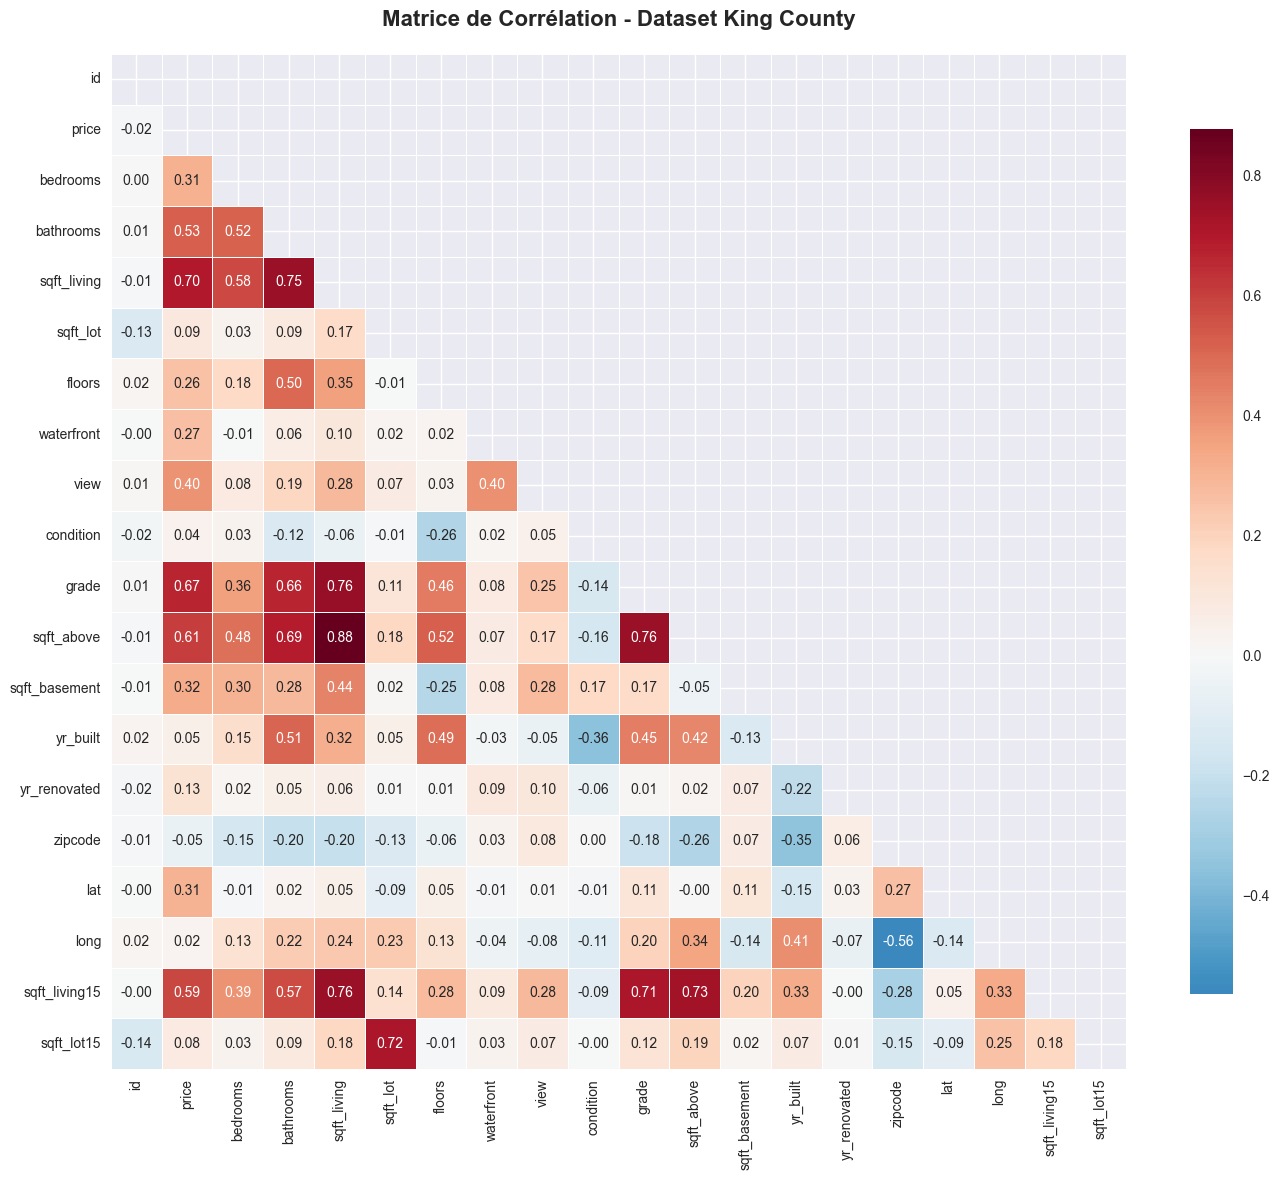

In [13]:
# Visualisation de la matrice de corrélation
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Matrice de Corrélation - Dataset King County', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [14]:
# Sélection des variables importantes pour le prix
important_threshold = 0.1  # Seuil de corrélation significative
important_features = []
dropped_features = []

for variable, correlation in price_correlations.items():
    if variable != 'price':
        if abs(correlation) >= important_threshold:
            important_features.append(variable)
        else:
            dropped_features.append(variable)

print(f"\n⭐ VARIABLES SÉLECTIONNÉES (|corrélation| ≥ {important_threshold}) :")
print(f"   Nombre : {len(important_features)}")
for feature in important_features:
    corr = price_correlations[feature]
    print(f"   • {feature}: {corr:.3f}")


⭐ VARIABLES SÉLECTIONNÉES (|corrélation| ≥ 0.1) :
   Nombre : 12
   • sqft_living: 0.702
   • grade: 0.667
   • sqft_above: 0.606
   • sqft_living15: 0.585
   • bathrooms: 0.525
   • view: 0.397
   • sqft_basement: 0.324
   • bedrooms: 0.308
   • lat: 0.307
   • waterfront: 0.266
   • floors: 0.257
   • yr_renovated: 0.126


d'apres le resultat du feature relle donner plus bas 
nous avons comme
 lat: 0.177410
 waterfront: 0.0373


VARIABLE LAT:  Importance très élevée 

Même avec une corrélation linéaire modérée, c'est clairement une variable clé pour le modèle

Explication : La latitude capture des effets géographiques complexes (quartiers premium, proximité avec le centre-ville, etc.)

In [15]:
# Option 1 : Créer des zones géographiques (clusters)
from sklearn.cluster import KMeans
coords = df[['lat', 'long']].values
kmeans = KMeans(n_clusters=5, random_state=42).fit(coords)
df['geo_zone'] = kmeans.labels_



In [16]:
print(f"\n VARIABLES À SUPPRIMER (impact faible sur le prix) :")
print(f"   Nombre : {len(dropped_features)}")
for feature in dropped_features:
    corr = price_correlations[feature]
    print(f"   • {feature}: {corr:.3f}")


 VARIABLES À SUPPRIMER (impact faible sur le prix) :
   Nombre : 7
   • sqft_lot: 0.090
   • sqft_lot15: 0.082
   • yr_built: 0.054
   • condition: 0.036
   • long: 0.022
   • id: -0.017
   • zipcode: -0.053


6 . Analyse exploratoire des variables importantes

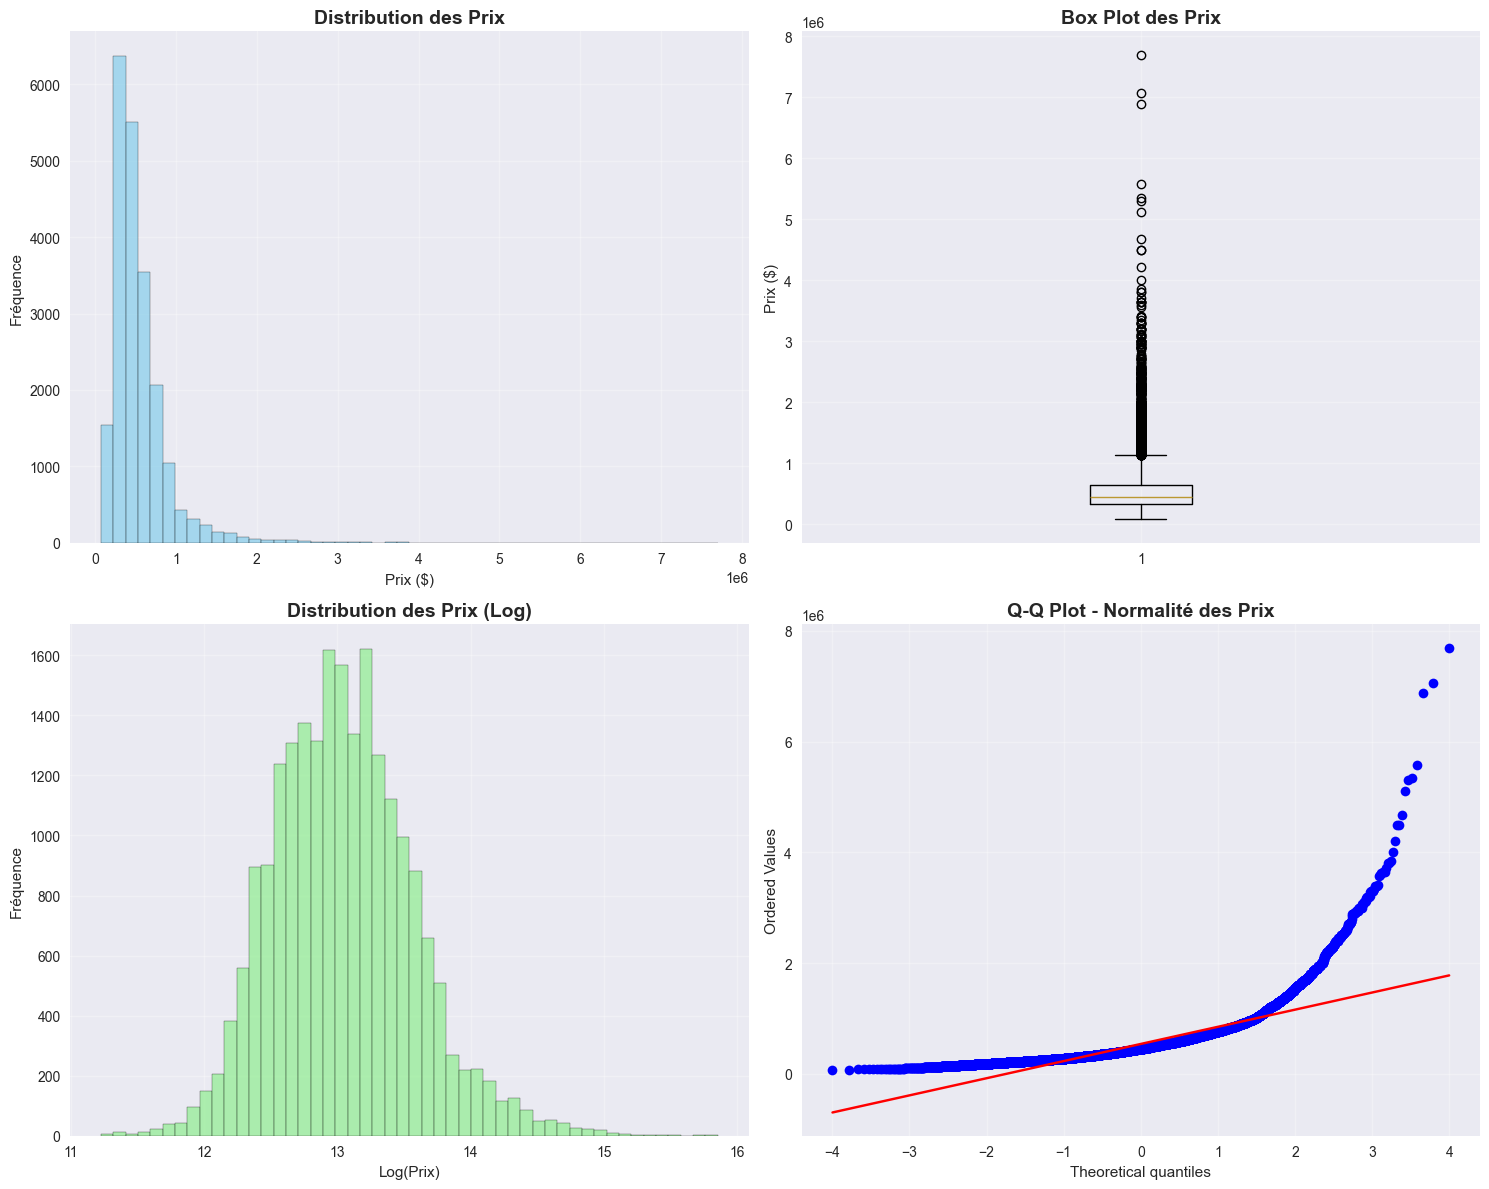

In [17]:
# Distribution de la variable cible
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Histogramme du prix
axes[0,0].hist(df['price'], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
axes[0,0].set_title('Distribution des Prix', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Prix ($)')
axes[0,0].set_ylabel('Fréquence')
axes[0,0].grid(True, alpha=0.3)

# Box plot du prix
axes[0,1].boxplot(df['price'], vert=True)
axes[0,1].set_title('Box Plot des Prix', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Prix ($)')
axes[0,1].grid(True, alpha=0.3)

# Prix en log (pour réduire l'asymétrie)
axes[1,0].hist(np.log(df['price']), bins=50, alpha=0.7, edgecolor='black', color='lightgreen')
axes[1,0].set_title('Distribution des Prix (Log)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Log(Prix)')
axes[1,0].set_ylabel('Fréquence')
axes[1,0].grid(True, alpha=0.3)

# Q-Q plot pour normalité
from scipy import stats
stats.probplot(df['price'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot - Normalité des Prix', fontsize=14, fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

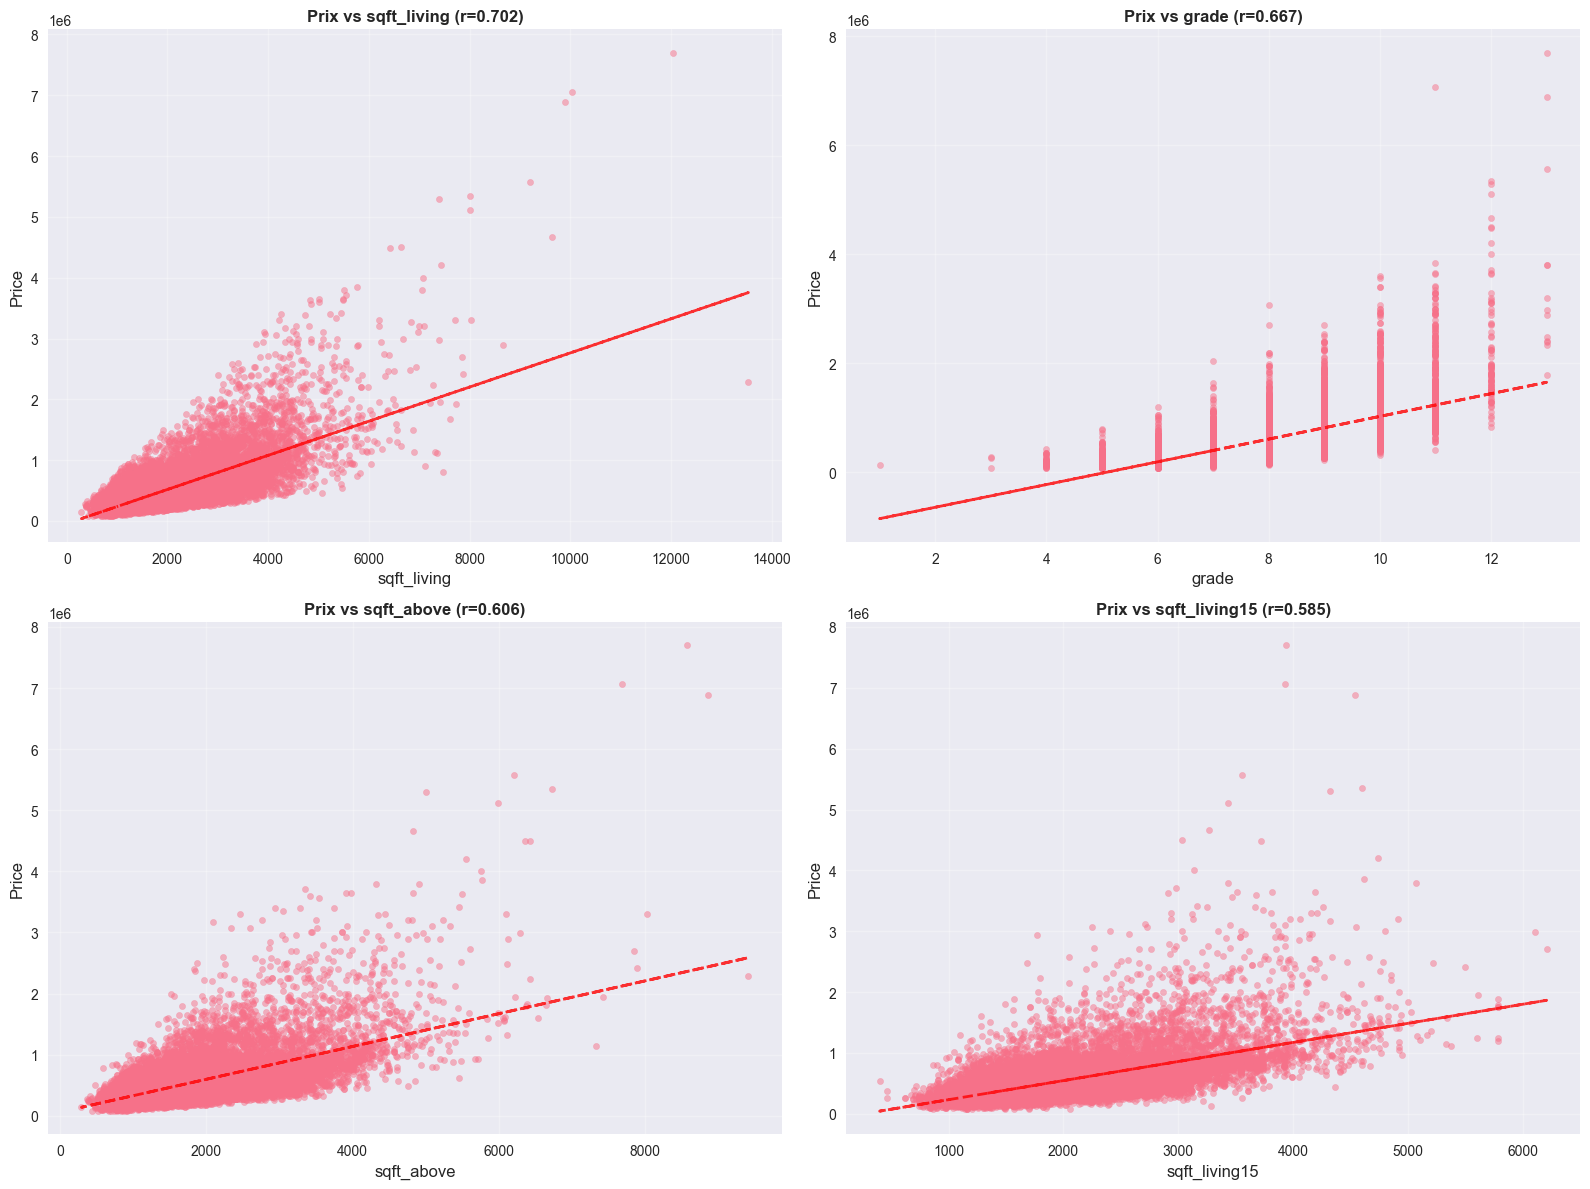

In [18]:
# Analyse des top variables corrélées
top_features = [feat for feat in important_features if abs(price_correlations[feat]) > 0.3][:4]

if len(top_features) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for i, feature in enumerate(top_features):
        axes[i].scatter(df[feature], df['price'], alpha=0.5, s=20)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Price', fontsize=12)
        axes[i].set_title(f'Prix vs {feature} (r={price_correlations[feature]:.3f})', 
                         fontsize=12, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        
        # Ligne de tendance
        z = np.polyfit(df[feature], df['price'], 1)
        p = np.poly1d(z)
        axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
    
    plt.tight_layout()
    plt.show()

7 . Feature Engineering et préparation finale

In [19]:
# Copie des données pour le traitement
df_processed = df.copy()

In [20]:

# Age de la propriété
if 'yr_built' in important_features:
    df_processed['property_age'] = 2024 - df_processed['yr_built']
    print("  ✅ property_age (âge de la propriété)")

In [21]:
# Indicateur de rénovation et âge depuis rénovation
if 'yr_renovated' in df_processed.columns:
    df_processed['is_renovated'] = (df_processed['yr_renovated'] > 0).astype(int)
    df_processed['years_since_renovation'] = np.where(
        df_processed['yr_renovated'] > 0,
        2024 - df_processed['yr_renovated'],
        df_processed.get('property_age', 2024 - df_processed['yr_built'])
    )
    print("  ✅ is_renovated (indicateur rénovation)")
    print("  ✅ years_since_renovation (années depuis rénovation)")

  ✅ is_renovated (indicateur rénovation)
  ✅ years_since_renovation (années depuis rénovation)


In [22]:
# Ratios de surfaces
if 'sqft_living' in important_features and 'sqft_lot' in important_features:
    df_processed['living_lot_ratio'] = df_processed['sqft_living'] / (df_processed['sqft_lot'] + 1)
    print("  ✅ living_lot_ratio (ratio surface habitable/terrain)")
if 'sqft_living' in important_features and 'bedrooms' in important_features:
    df_processed['sqft_per_bedroom'] = df_processed['sqft_living'] / (df_processed['bedrooms'] + 1)
    print("  ✅ sqft_per_bedroom (surface par chambre)")

  ✅ sqft_per_bedroom (surface par chambre)


In [23]:
# Score de qualité combiné
if 'grade' in important_features and 'condition' in important_features:
    df_processed['quality_score'] = df_processed['grade'] * df_processed['condition']
    print("  ✅ quality_score (score qualité combiné)")

In [24]:
# Sélection finale des variables
print(f"\n🎯 Sélection finale des variables :")

# Variables de base importantes
selected_features = important_features.copy()

# Ajout des nouvelles variables créées si pertinentes
new_features = ['property_age', 'is_renovated', 'years_since_renovation', 
               'living_lot_ratio', 'sqft_per_bedroom', 'quality_score']

for feature in new_features:
    if feature in df_processed.columns:
        # Vérifier la corrélation de la nouvelle variable
        new_corr = df_processed[feature].corr(df_processed['price'])
        if abs(new_corr) > important_threshold:
            selected_features.append(feature)
            print(f"  ✅ {feature} ajoutée (corrélation: {new_corr:.3f})")


🎯 Sélection finale des variables :
  ✅ is_renovated ajoutée (corrélation: 0.126)
  ✅ years_since_renovation ajoutée (corrélation: -0.106)
  ✅ sqft_per_bedroom ajoutée (corrélation: 0.631)


In [25]:
# Suppression des variables redondantes ou inutiles
variables_to_remove = [
    'id',  # Identifiant unique (non prédictif pour le prix)
    'date',  # Date de vente (pas prédictive pour le prix)
    'zipcode',  
    'yr_built',  # Remplacé par property_age
    'yr_renovated'  # Remplacé par is_renovated et years_since_renovation
    
]

In [26]:
# Supprimer seulement si elles existent et ne sont pas importantes
for var in variables_to_remove:
    if var in selected_features and var in df_processed.columns:
        # Vérifier si on a une alternative
        alternatives = {
            'yr_built': 'property_age',
            'yr_renovated': 'is_renovated'
        }
        if var in alternatives and alternatives[var] in selected_features:
            selected_features.remove(var)
            print(f"  ❌ {var} supprimée (remplacée par {alternatives[var]})")

  ❌ yr_renovated supprimée (remplacée par is_renovated)


In [27]:
# Dataset final
final_features = ['price'] + selected_features
df_final = df_processed[final_features].copy()

print(f"\n📊 Dataset final :")
print(f"  • Observations : {df_final.shape[0]:,}")
print(f"  • Variables : {df_final.shape[1]} (incluant price)")
print(f"  • Variables explicatives : {len(selected_features)}")

print(f"\n📋 Variables finales sélectionnées :")
for i, feature in enumerate(selected_features, 1):
    corr = df_final[feature].corr(df_final['price'])
    print(f"  {i:2d}. {feature:20} (r={corr:.3f})")


📊 Dataset final :
  • Observations : 21,613
  • Variables : 15 (incluant price)
  • Variables explicatives : 14

📋 Variables finales sélectionnées :
   1. sqft_living          (r=0.702)
   2. grade                (r=0.667)
   3. sqft_above           (r=0.606)
   4. sqft_living15        (r=0.585)
   5. bathrooms            (r=0.525)
   6. view                 (r=0.397)
   7. sqft_basement        (r=0.324)
   8. bedrooms             (r=0.308)
   9. lat                  (r=0.307)
  10. waterfront           (r=0.266)
  11. floors               (r=0.257)
  12. is_renovated         (r=0.126)
  13. years_since_renovation (r=-0.106)
  14. sqft_per_bedroom     (r=0.631)


8 . Préparation des données pour modélisation

In [28]:
# Gestion des valeurs manquantes dans le dataset final
print("🔍 Vérification finale des données :")
final_missing = df_final.isnull().sum()
if final_missing.sum() > 0:
    print("⚠️ Valeurs manquantes détectées :")
    for col, missing in final_missing[final_missing > 0].items():
        print(f"  • {col}: {missing}")
    
    # Imputation simple pour les numériques
    numeric_cols = df_final.select_dtypes(include=[np.number]).columns
    df_final[numeric_cols] = df_final[numeric_cols].fillna(df_final[numeric_cols].median())
    print("✅ Valeurs manquantes imputées par la médiane")
else:
    print("✅ Aucune valeur manquante")

🔍 Vérification finale des données :
✅ Aucune valeur manquante


In [29]:
# Séparation X et y
X = df_final.drop('price', axis=1)
y = df_final['price']

print(f"\n📊 Données finales :")
print(f"  • Variables explicatives (X) : {X.shape}")
print(f"  • Variable cible (y) : {y.shape}")
print(f"  • Prix moyen : ${y.mean():,.0f}")


📊 Données finales :
  • Variables explicatives (X) : (21613, 14)
  • Variable cible (y) : (21613,)
  • Prix moyen : $540,088


In [30]:
# Division train/test stratifiée par quartiles de prix
print(f"\n🔄 Division train/test :")

# Création de quartiles de prix pour stratification
y_quartiles = pd.qcut(y, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_quartiles
)

print(f"  • Entraînement : {X_train.shape[0]:,} observations ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  • Test : {X_test.shape[0]:,} observations ({X_test.shape[0]/len(X)*100:.1f}%)")



🔄 Division train/test :
  • Entraînement : 17,290 observations (80.0%)
  • Test : 4,323 observations (20.0%)


In [31]:
# Vérification de la distribution des prix
print(f"\n💰 Distribution des prix (train vs test) :")
print(f"  • Train - Moyenne: ${y_train.mean():,.0f}, Médiane: ${y_train.median():,.0f}")
print(f"  • Test  - Moyenne: ${y_test.mean():,.0f}, Médiane: ${y_test.median():,.0f}")


💰 Distribution des prix (train vs test) :
  • Train - Moyenne: $539,976, Médiane: $450,000
  • Test  - Moyenne: $540,537, Médiane: $450,000


9 . Modélisation Random Forest optimisée

In [32]:
# Modèle de référence
print("🔧 Entraînement du modèle de référence...")
rf_baseline = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_baseline.fit(X_train, y_train)

🔧 Entraînement du modèle de référence...


RandomForestRegressor(n_jobs=-1, random_state=42)

In [33]:
# Prédictions baseline
y_pred_baseline = rf_baseline.predict(X_test)

def evaluate_model(y_true, y_pred, model_name="Modèle"):
    """Évalue un modèle avec plusieurs métriques"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Erreur moyenne en pourcentage
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n📊 Métriques - {model_name}")
    print(f"  • R² Score  : {r2:.4f}")
    print(f"  • RMSE      : ${rmse:,.0f}")
    print(f"  • MAE       : ${mae:,.0f}")
    print(f"  • MAPE      : {mape:.2f}%")
    
    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

In [34]:
# Évaluation baseline
metrics_baseline = evaluate_model(y_test, y_pred_baseline, "Baseline")


📊 Métriques - Baseline
  • R² Score  : 0.8460
  • RMSE      : $140,804
  • MAE       : $82,212
  • MAPE      : 15.54%


In [35]:
# Optimisation des hyperparamètres
print(f"\n⚙️ Optimisation des hyperparamètres...")
print("   Cela peut prendre quelques minutes...")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


⚙️ Optimisation des hyperparamètres...
   Cela peut prendre quelques minutes...


In [36]:
# Recherche par grille avec validation croisée
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n🏆 Meilleurs hyperparamètres trouvés :")
for param, value in grid_search.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\n📈 Score de validation croisée : {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [ ]:
# Modèle final optimisé
rf_final = grid_search.best_estimator_
y_pred_final = rf_final.predict(X_test)

In [ ]:
# Calcul des métriques pour le modèle final optimisé
metrics_final = evaluate_model(y_test, y_pred_final, "Optimisé")

# Amélioration
improvement_r2 = metrics_final['R2'] - metrics_baseline['R2']
improvement_rmse = metrics_baseline['RMSE'] - metrics_final['RMSE']

print(f"\n🚀 AMÉLIORATION avec l'optimisation :")
print(f"  • R² : +{improvement_r2:.4f}")
print(f"  • RMSE : -${improvement_rmse:,.0f}")


📊 Métriques - Optimisé
  • R² Score  : 0.8449
  • RMSE      : $141,276
  • MAE       : $82,097
  • MAPE      : 15.44%

🚀 AMÉLIORATION avec l'optimisation :
  • R² : +-0.0010
  • RMSE : -$-472


10 Evaluation Approfondie et Visualisations

In [ ]:
# Validation croisée détaillée
cv_scores = cross_val_score(rf_final, X_train, y_train, cv=5, scoring='r2')
print(f"🔄 Validation croisée 5-fold :")
print(f"  • Scores R² : {[f'{score:.3f}' for score in cv_scores]}")
print(f"  • Moyenne   : {cv_scores.mean():.4f}")
print(f"  • Écart-type: {cv_scores.std():.4f}")
print(f"  • Intervalle: [{cv_scores.mean()-2*cv_scores.std():.3f}, {cv_scores.mean()+2*cv_scores.std():.3f}]")


🔄 Validation croisée 5-fold :
  • Scores R² : ['0.852', '0.835', '0.819', '0.832', '0.804']
  • Moyenne   : 0.8285
  • Écart-type: 0.0164
  • Intervalle: [0.796, 0.861]


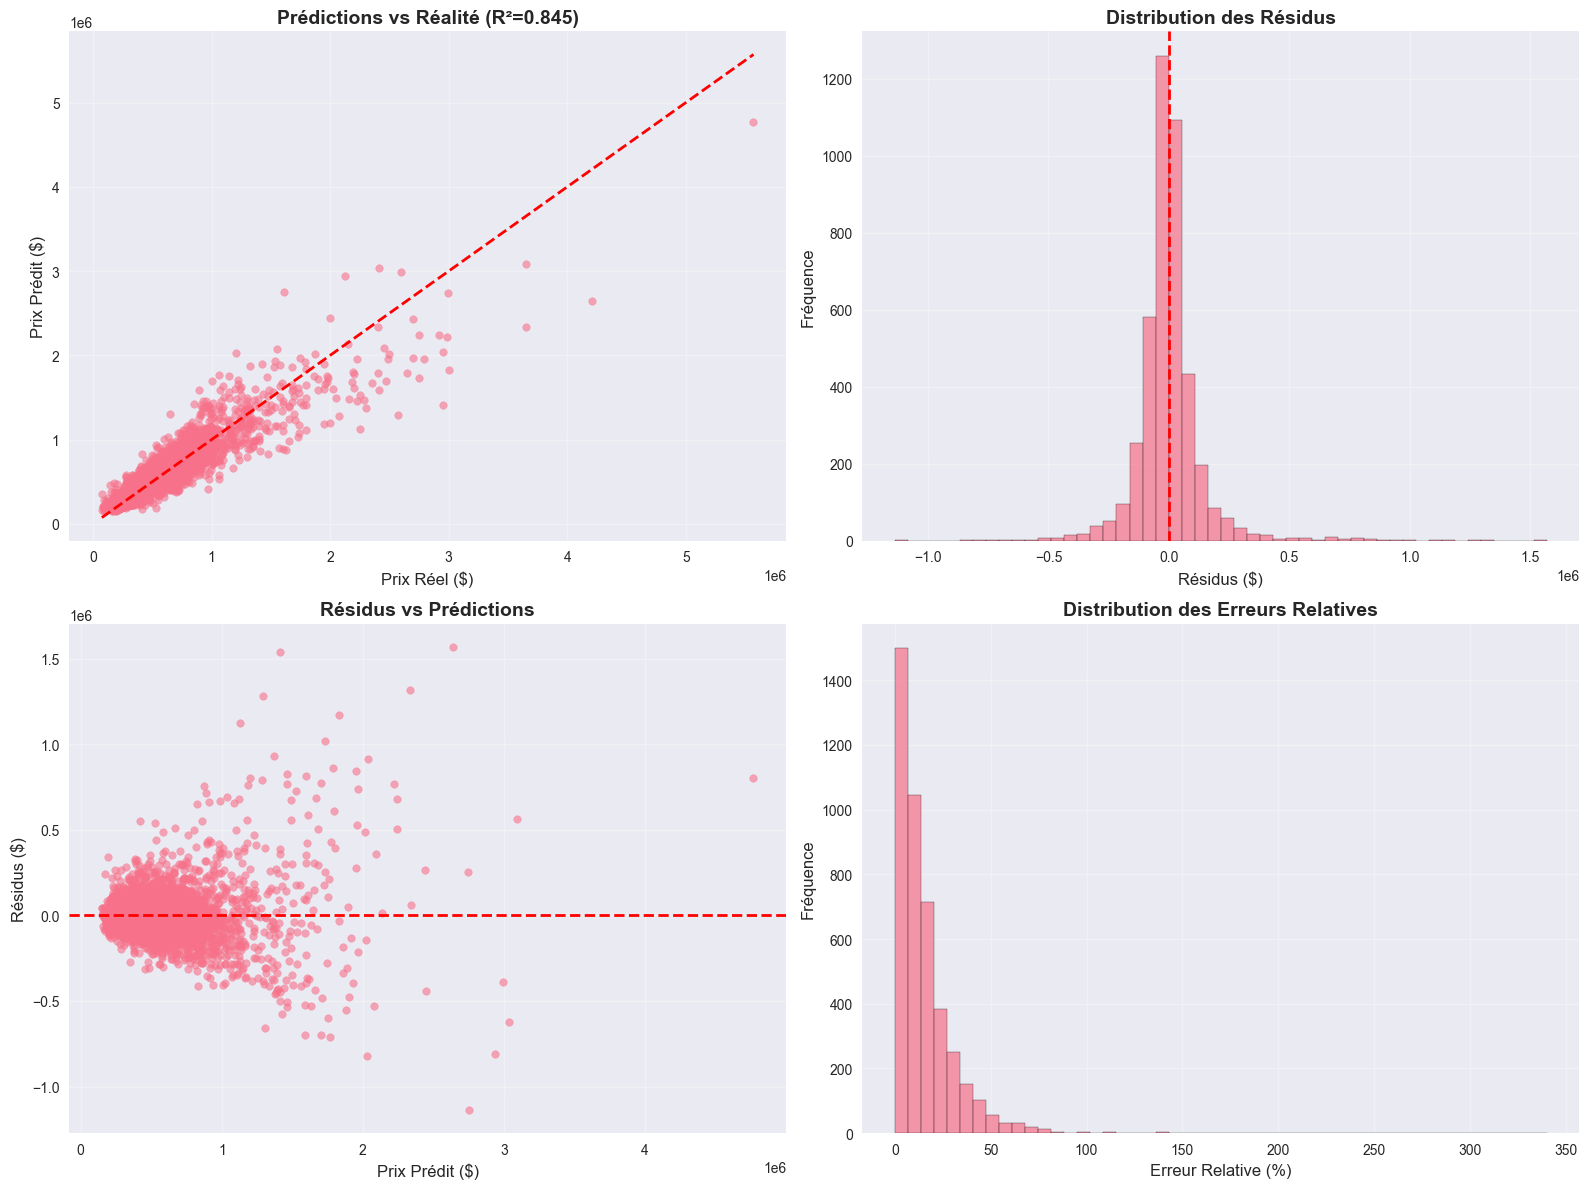

In [ ]:
# Visualisations des résultats
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Prédictions vs Réalité
axes[0,0].scatter(y_test, y_pred_final, alpha=0.6, s=30)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Prix Réel ($)', fontsize=12)
axes[0,0].set_ylabel('Prix Prédit ($)', fontsize=12)
axes[0,0].set_title(f'Prédictions vs Réalité (R²={metrics_final["R2"]:.3f})', fontsize=14, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# 2. Distribution des résidus
residuals = y_test - y_pred_final
axes[0,1].hist(residuals, bins=50, alpha=0.7, edgecolor='black')
axes[0,1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0,1].set_xlabel('Résidus ($)', fontsize=12)
axes[0,1].set_ylabel('Fréquence', fontsize=12)
axes[0,1].set_title('Distribution des Résidus', fontsize=14, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# 3. Résidus vs Prédictions
axes[1,0].scatter(y_pred_final, residuals, alpha=0.6, s=30)
axes[1,0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Prix Prédit ($)', fontsize=12)
axes[1,0].set_ylabel('Résidus ($)', fontsize=12)
axes[1,0].set_title('Résidus vs Prédictions', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Erreurs relatives
relative_errors = np.abs(residuals) / y_test * 100
axes[1,1].hist(relative_errors, bins=50, alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Erreur Relative (%)', fontsize=12)
axes[1,1].set_ylabel('Fréquence', fontsize=12)
axes[1,1].set_title('Distribution des Erreurs Relatives', fontsize=14, fontweight='bold')
axes[1,1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Analyse des résidus
print(f"📊 Analyse des résidus :")
print(f"  • Moyenne : ${residuals.mean():,.0f}")
print(f"  • Écart-type : ${residuals.std():,.0f}")
print(f"  • Erreur médiane : ${np.median(np.abs(residuals)):,.0f}")
print(f"  • 90% des erreurs < ${np.percentile(np.abs(residuals), 90):,.0f}")

📊 Analyse des résidus :
  • Moyenne : $-988
  • Écart-type : $141,289
  • Erreur médiane : $48,086
  • 90% des erreurs < $179,848


11 IMPORTANCE DES VARIABLES

In [ ]:
# Importance basée sur les arbres
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_final.feature_importances_
}).sort_values('importance', ascending=False)

print("🎯 Importance des variables (Gini) :")
print("-" * 45)
for idx, row in feature_importance.head(10).iterrows():
    print(f"  {row['feature']:20} : {row['importance']:.4f}")


🎯 Importance des variables (Gini) :
---------------------------------------------
  grade                : 0.3512
  sqft_living          : 0.2745
  lat                  : 0.1776
  years_since_renovation : 0.0407
  waterfront           : 0.0374
  sqft_living15        : 0.0349
  view                 : 0.0234
  sqft_per_bedroom     : 0.0179
  sqft_above           : 0.0152
  bathrooms            : 0.0098


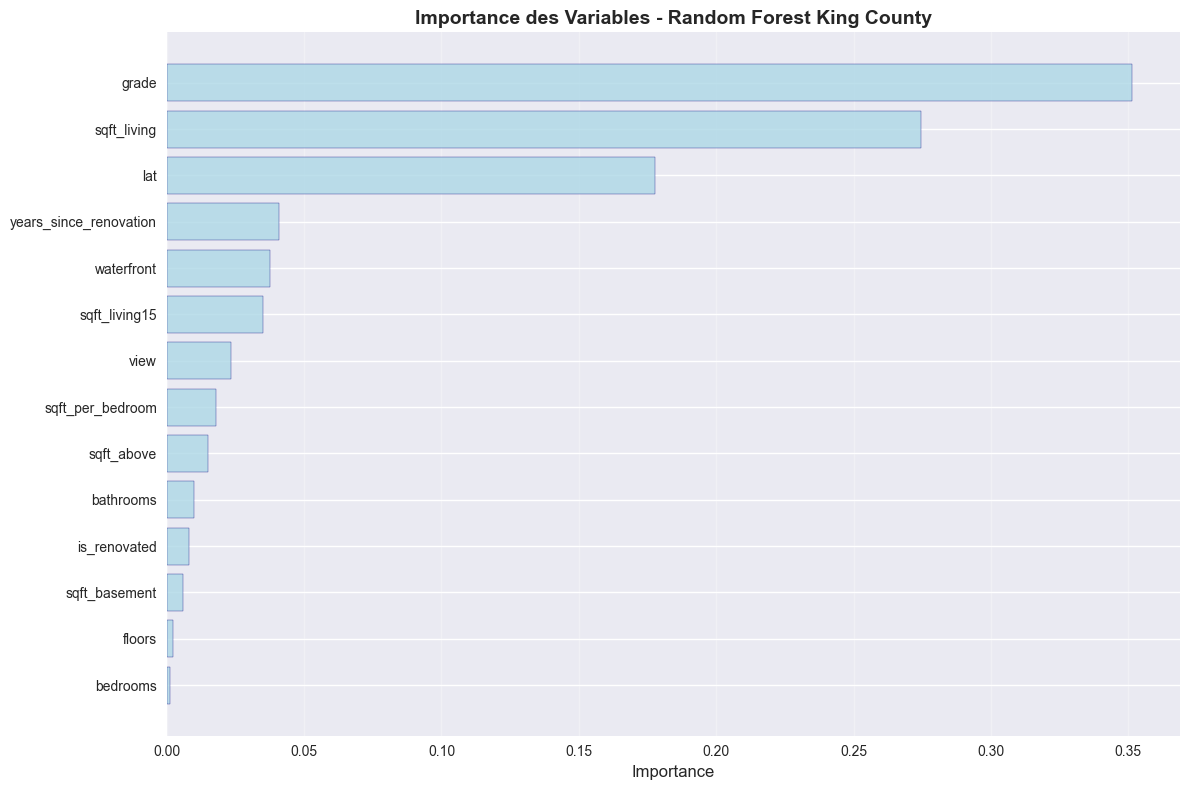

In [ ]:
# Graphique d'importance
plt.figure(figsize=(12, 8))
top_features_plot = feature_importance.head(min(15, len(feature_importance)))
plt.barh(range(len(top_features_plot)), top_features_plot['importance'], 
         color='lightblue', edgecolor='navy', alpha=0.8)
plt.yticks(range(len(top_features_plot)), top_features_plot['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Importance des Variables - Random Forest King County', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [ ]:
# Vérifiez l'importance exacte dans votre modèle
print(feature_importance[feature_importance['feature'].isin(['lat', 'waterfront'])])

      feature  importance
8         lat    0.177568
9  waterfront    0.037423


12 EXPORTATION DU MODELE AVEC PICKLE

In [ ]:
# Préparation des éléments à sauvegarder
model_package = {
    'model': rf_final,
    'feature_names': list(X.columns),
    'model_params': rf_final.get_params(),
    'performance_metrics': metrics_final,
    'feature_importance': feature_importance.to_dict('records'),
    'training_info': {
        'train_size': len(X_train),
        'test_size': len(X_test),
        'cv_score_mean': cv_scores.mean(),
        'cv_score_std': cv_scores.std()
    }
}

In [ ]:
# Sauvegarde avec pickle
try:
    with open('rf_kings_county_model.pkl', 'wb') as f:
        pickle.dump(model_package, f)
    print("✅ Modèle sauvegardé : 'rf_kings_county_model.pkl'")
except Exception as e:
    print(f"❌ Erreur lors de la sauvegarde : {e}")

✅ Modèle sauvegardé : 'rf_kings_county_model.pkl'


13 Resume et recommandations

In [ ]:
print(f"\n📋 RÉSUMÉ FINAL")
print("="*50)

print(f"🎯 MODÈLE FINAL :")
print(f"  • Algorithme     : Random Forest Regressor")
print(f"  • Variables      : {len(X.columns)} features sélectionnées")
print(f"  • Observations   : {len(df):,} (train: {len(X_train):,}, test: {len(X_test):,})")
print(f"  • R² Score       : {metrics_final['R2']:.4f}")
print(f"  • RMSE           : ${metrics_final['RMSE']:,.0f}")
print(f"  • MAE            : ${metrics_final['MAE']:,.0f}")
print(f"  • MAPE           : {metrics_final['MAPE']:.2f}%")

print(f"\n⭐ TOP 5 VARIABLES PRÉDICTIVES :")
for i, (_, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    print(f"  {i}. {row['feature']:20} : {row['importance']:.4f}")


📋 RÉSUMÉ FINAL
🎯 MODÈLE FINAL :
  • Algorithme     : Random Forest Regressor
  • Variables      : 14 features sélectionnées
  • Observations   : 21,613 (train: 17,290, test: 4,323)
  • R² Score       : 0.8449
  • RMSE           : $141,276
  • MAE            : $82,097
  • MAPE           : 15.44%

⭐ TOP 5 VARIABLES PRÉDICTIVES :
  1. grade                : 0.3512
  2. sqft_living          : 0.2745
  3. lat                  : 0.1776
  4. years_since_renovation : 0.0407
  5. waterfront           : 0.0374
